In [1]:
# HW1. Q.3 

# imports we need to use.

import numpy as np
import matplotlib.pyplot as plt
import os 
import math
import cv2



Text(0, 0.5, 'y')

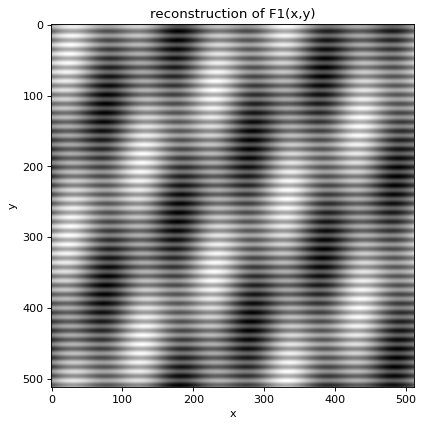

In [2]:

# part 3.a. Find F1 excplicitly form.  
pi=math.pi # define parameter.
freq=np.array([2/512,5/512,40/512])
omega=2*pi*freq


f1_reconstruction=np.zeros((512,512))

for x in range(512):
    for y in range(512):
        f1_reconstruction[x,y]=math.sin(omega[0]*(x+y))+math.sin(omega[1]*(y))+math.sin(omega[2]*(x))
        
plt.figure(figsize=(8,6),dpi=80)
plt.imshow(f1_reconstruction, cmap='gray')
plt.title("reconstruction of F1(x,y)")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'v')

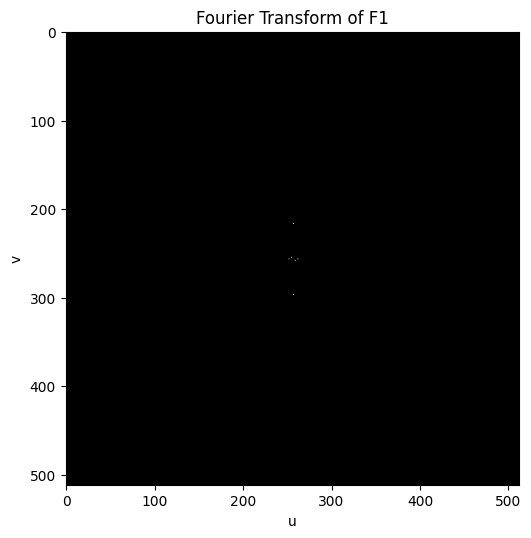

In [3]:
#Section 3.b. Furier Transform of F1(x,y).

ft_f1=np.fft.fft2(f1_reconstruction)
ft_f1_Shift=np.fft.fftshift(ft_f1)


plt.figure(figsize=(8,6),dpi=100)
plt.imshow(np.log(1+np.abs(ft_f1_Shift)),cmap='gray')
plt.title("Fourier Transform of F1")
plt.xlabel('u')
plt.ylabel('v')

Text(0, 0.5, 'y')

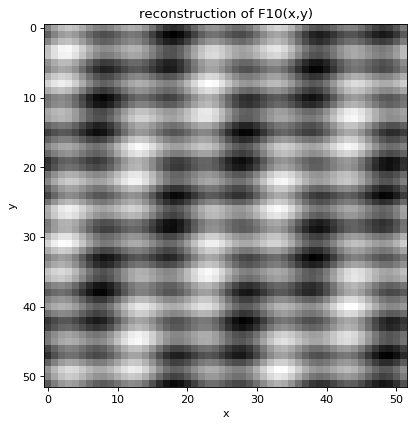

In [4]:
# Section 3.c. dx=dy=10

F_10=np.zeros((52,52))

dx=10
dy=10

[row,column]=f1_reconstruction.shape

for r in range(0,row,dx):
    for col in range(0,column,dy):
        F_10[round(r/10),round(col/10)]=f1_reconstruction[r,col]
        



plt.figure(figsize=(8,6),dpi=80)
plt.imshow(F_10, cmap='gray')
plt.title("reconstruction of F10(x,y)")
plt.xlabel("x")
plt.ylabel("y")
        

Text(0, 0.5, 'v')

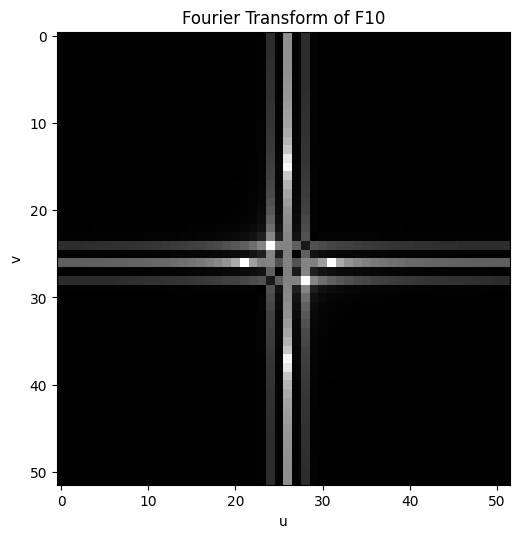

In [5]:
F_10_ft=np.fft.fft2(F_10)
F_10_ft_Shift=np.fft.fftshift(F_10_ft)

plt.figure(figsize=(8,6),dpi=100)
plt.imshow(np.log(1+np.abs(F_10_ft_Shift)),cmap='gray')
plt.title("Fourier Transform of F10")
plt.xlabel('u')
plt.ylabel('v')

Text(0, 0.5, 'K')

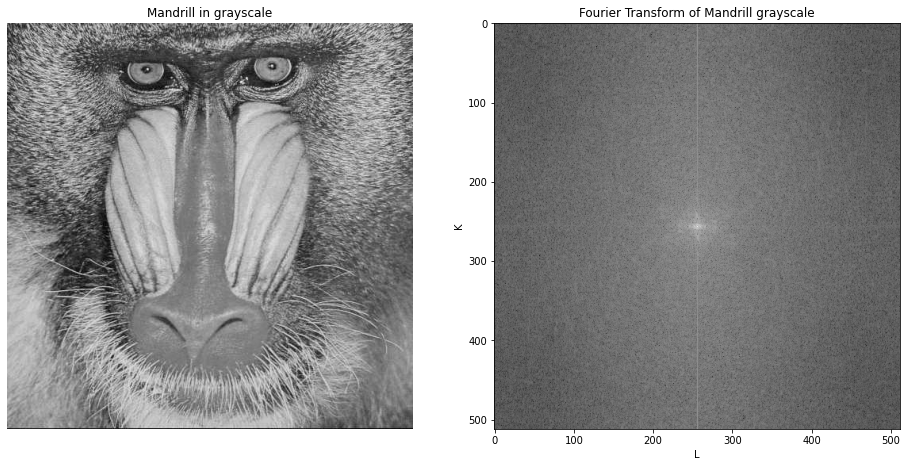

In [6]:
# Section 3.e.

Mandrill_image = cv2.imread(os.path.join(".","../given_data","Mandrill.jpg"))
# convert the image to gray scale mode.
Mandrill_image_rgb = cv2.cvtColor(Mandrill_image, cv2.COLOR_BGR2RGB)
Mandrill_grayscale = cv2.cvtColor(Mandrill_image,cv2.COLOR_BGR2GRAY)

# Fourier Transform 
ft_Mandrill=np.fft.fft2(Mandrill_grayscale)
ft_Mandrill_shift=np.fft.fftshift(ft_Mandrill)

# display images of Mandrill and it's Fourier Transform.

fig= plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 2 ,1) # create a subplot of certain size
ax.imshow(Mandrill_grayscale, cmap='gray')
ax.set_title("Mandrill in grayscale")
ax.set_axis_off()


ax = fig.add_subplot(1, 2 ,2) # create a subplot of certain size
ax.imshow(np.log(1+np.abs(ft_Mandrill_shift)), cmap='gray')
ax.set_title("Fourier Transform of Mandrill grayscale")
ax.set_xlabel("L")
ax.set_ylabel("K")



Text(0, 0.5, 'K')

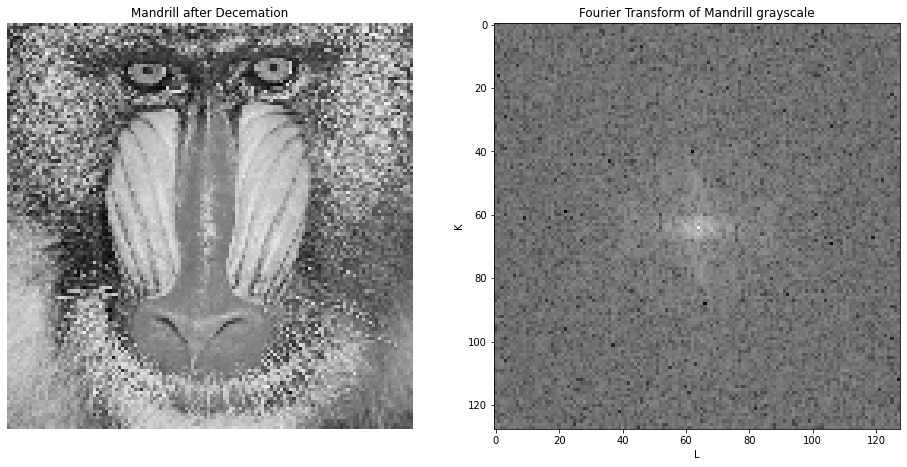

In [7]:
# Down sampling 4th pixel.

F_4=np.zeros((128,128))

dx=4
dy=4

[r,c]=Mandrill_grayscale.shape

for i in range(0,r,dx):
    for j in range(0,column,dy):
        F_4[round(i/4),round(j/4)]=Mandrill_grayscale[i,j]
        
# Fourier Transform for F_4.

# Fourier Transform 
ft_F_4=np.fft.fft2(F_4)
ft_F_4_shift=np.fft.fftshift(ft_F_4)


fig= plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 2 ,1) # create a subplot of certain size
ax.imshow(F_4, cmap='gray')
ax.set_title("Mandrill after Decemation")
ax.set_axis_off()

ax = fig.add_subplot(1, 2 ,2) # create a subplot of certain size
ax.imshow(np.log(1+np.abs(ft_F_4_shift)), cmap='gray')
ax.set_title("Fourier Transform of Mandrill grayscale")
ax.set_xlabel("L")
ax.set_ylabel("K")


